<a href="https://colab.research.google.com/github/chadantomar/ML/blob/main/CNN_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dog and Cat Classification using Custom Model using CNN on Dog and Cat Dataset *Kaggle

**Step1** : Download Kaggle Json file to pull Dataset
   ( Drop kaggle.json on Root to process it fast , if we upload on Drive it will take time to fetch in runtime environment o colab and process )

In [2]:
#Create .kaggle dir on root to run the kaggle command
!mkdir ~/.kaggle

In [5]:
#Move Kaggle file to  ~/.kaggle
!mv '/content/kaggle.json' /root/.kaggle/

In [6]:
!chmod 600 /root/.kaggle/kaggle.json

In [7]:
!kaggle datasets download -d salader/dogs-vs-cats

 99% 1.06G/1.06G [00:05<00:00, 124MB/s]
100% 1.06G/1.06G [00:05<00:00, 207MB/s]


In [8]:
#unzip
!unzip dogs-vs-cats.zip

Streaming output truncated to the last 5000 lines.
  inflating: train/dogs/dog.4419.jpg  
  inflating: train/dogs/dog.442.jpg  
  inflating: train/dogs/dog.4420.jpg  
  inflating: train/dogs/dog.4421.jpg  
  inflating: train/dogs/dog.4422.jpg  
  inflating: train/dogs/dog.4424.jpg  
  inflating: train/dogs/dog.4425.jpg  
  inflating: train/dogs/dog.4426.jpg  
  inflating: train/dogs/dog.4427.jpg  
  inflating: train/dogs/dog.4431.jpg  
  inflating: train/dogs/dog.4433.jpg  
  inflating: train/dogs/dog.4436.jpg  
  inflating: train/dogs/dog.4438.jpg  
  inflating: train/dogs/dog.4439.jpg  
  inflating: train/dogs/dog.444.jpg  
  inflating: train/dogs/dog.4440.jpg  
  inflating: train/dogs/dog.4441.jpg  
  inflating: train/dogs/dog.4442.jpg  
  inflating: train/dogs/dog.4443.jpg  
  inflating: train/dogs/dog.4444.jpg  
  inflating: train/dogs/dog.4445.jpg  
  inflating: train/dogs/dog.4446.jpg  
  inflating: train/dogs/dog.445.jpg  
  inflating: train/dogs/dog.4450.jpg  
  inflating: tra

In [9]:
import tensorflow as tf

Generates a tf.data.Dataset from image files in a directory.

In [10]:

train_ds=tf.keras.utils.image_dataset_from_directory( "/content/dogs_vs_cats/train",
    labels="inferred",
    label_mode="int", ## assign 0 to cat and 1 to dog as per folder positioning
    batch_size=32,
    image_size=(256, 256)
)

validate_ds=tf.keras.utils.image_dataset_from_directory( "/content/dogs_vs_cats/test",
    labels="inferred",
    label_mode="int",
    batch_size=32,
    image_size=(256, 256)
)

## can see 2 classes of 20k training dataset and 5k test/validate dataset

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


#Lets see how the dataset looks like

In [11]:
train_ds.as_numpy_iterator().next()

(array([[[[ 40.        ,  21.        ,   4.        ],
          [ 40.1875    ,  21.1875    ,   4.1875    ],
          [ 41.3125    ,  22.3125    ,   5.3125    ],
          ...,
          [ 10.        ,  11.        ,   5.        ],
          [ 10.        ,  11.        ,   5.        ],
          [ 10.        ,  11.        ,   5.        ]],
 
         [[ 39.816406  ,  20.816406  ,   3.8164062 ],
          [ 40.003906  ,  21.003906  ,   4.0039062 ],
          [ 40.87378   ,  21.87378   ,   4.8737793 ],
          ...,
          [ 10.        ,  11.        ,   5.        ],
          [ 10.        ,  11.        ,   5.        ],
          [ 10.        ,  11.        ,   5.        ]],
 
         [[ 39.        ,  20.        ,   3.        ],
          [ 39.1875    ,  20.1875    ,   3.1875    ],
          [ 40.3125    ,  21.3125    ,   4.3125    ],
          ...,
          [ 10.        ,  11.        ,   5.        ],
          [ 10.        ,  11.        ,   5.        ],
          [ 10.        ,  11.  

We can see data range is varying in array between 0 to 255

In [12]:
#Normalize
def preprocess(image,label):
  image= tf.cast(image/255., tf.float32)
  return image,label

In [13]:
train_ds=train_ds.map(preprocess)
validate_ds= validate_ds.map(preprocess)

In [14]:
train_ds.as_numpy_iterator().next()
##Now data will be n 0 and 1

(array([[[[0.39604014, 0.4391774 , 0.45486367],
          [0.38408825, 0.4272255 , 0.44291177],
          [0.3731205 , 0.41625774, 0.43978715],
          ...,
          [0.14810815, 0.59908855, 0.12457874],
          [0.13341425, 0.6074568 , 0.12450647],
          [0.12156863, 0.60784316, 0.12156863]],
 
         [[0.41170007, 0.45483732, 0.4705236 ],
          [0.39587694, 0.4390142 , 0.4547005 ],
          [0.37945634, 0.4225936 , 0.446123  ],
          ...,
          [0.14032356, 0.5943641 , 0.12430301],
          [0.13097958, 0.60344666, 0.12754054],
          [0.12156863, 0.60784316, 0.12703738]],
 
         [[0.42622548, 0.46936274, 0.485049  ],
          [0.40741423, 0.45055148, 0.46623775],
          [0.38594517, 0.42908242, 0.45261183],
          ...,
          [0.13376907, 0.5896982 , 0.12307723],
          [0.12827547, 0.60032797, 0.1287517 ],
          [0.12156863, 0.60784316, 0.13068321]],
 
         ...,
 
         [[0.11578584, 0.1589231 , 0.14323683],
          [0.11969

**Step2** : Create Model

In [15]:
model = tf.keras.Sequential()
# lets prepare 3 conv and 3 dense layer

model.add(tf.keras.layers.Conv2D(32, kernel_size=(3,3), padding="valid", activation="relu", input_shape=(256,256,3)))
model.add(tf.keras.layers.Conv2D(64, kernel_size=(3,3), padding="valid", activation="relu", strides=2))
model.add(tf.keras.layers.Conv2D(128, kernel_size=(3,3), padding="valid", activation="relu", strides=2))

#Flatten the tensor to 1 D Array to pass into Dense layer

model.add(tf.keras.layers.Flatten())

#Pass to Dense layer

model.add(tf.keras.layers.Dense(128, activation="relu"))

model.add(tf.keras.layers.Dense(64, activation="relu"))

model.add(tf.keras.layers.Dense(1, activation="sigmoid")) ##sigmoid because we have to do binary classification

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 126, 126, 64)      18496     
                                                                 
 conv2d_2 (Conv2D)           (None, 62, 62, 128)       73856     
                                                                 
 flatten (Flatten)           (None, 492032)            0         
                                                                 
 dense (Dense)               (None, 128)               62980224  
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 1)                 6

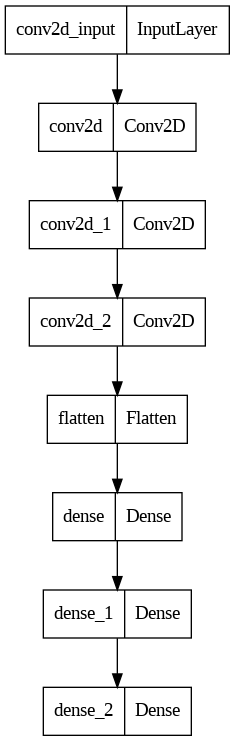

In [17]:
tf.keras.utils.plot_model(model)

In [18]:
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

In [19]:
from tensorflow.keras.callbacks import ModelCheckpoint
checkpoint_callback = ModelCheckpoint(filepath='/content/dog_cat_classy.h5', save_best_only=True)
history = model.fit(train_ds, epochs=10, batch_size=32, validation_data=validate_ds, callbacks=[checkpoint_callback])

Epoch 1/10
625/625 [==============================] - ETA: 0s - loss: 0.6788 - accuracy: 0.6065

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


625/625 [==============================] - 84s 122ms/step - loss: 0.6788 - accuracy: 0.6065 - val_loss: 0.6158 - val_accuracy: 0.6702
Epoch 2/10
625/625 [==============================] - 66s 104ms/step - loss: 0.5471 - accuracy: 0.7181 - val_loss: 0.6966 - val_accuracy: 0.6672
Epoch 3/10
625/625 [==============================] - 64s 102ms/step - loss: 0.3315 - accuracy: 0.8497 - val_loss: 1.2863 - val_accuracy: 0.6498
Epoch 4/10
625/625 [==============================] - 68s 108ms/step - loss: 0.1268 - accuracy: 0.9538 - val_loss: 1.5956 - val_accuracy: 0.6642
Epoch 5/10
625/625 [==============================] - 66s 105ms/step - loss: 0.0627 - accuracy: 0.9801 - val_loss: 1.6173 - val_accuracy: 0.6786
Epoch 6/10
625/625 [==============================] - 68s 109ms/step - loss: 0.0469 - accuracy: 0.9887 - val_loss: 1.7050 - val_accuracy: 0.6646
Epoch 7/10
625/625 [==============================] - 70s 112ms/step - loss: 0.0375 - accuracy: 0.9908 - val_loss: 2.0611 - val_accuracy: 0.6

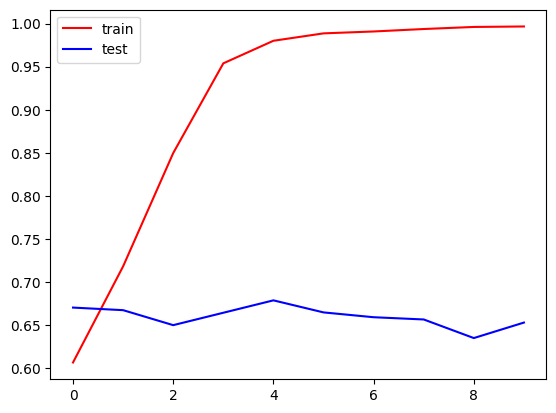

In [21]:
import matplotlib.pyplot as plt
plt.plot(history.history["accuracy"], color='r', label='train')
plt.plot(history.history["val_accuracy"], color='b', label='test')
plt.legend()
plt.show()

Here we can clearly see that that huge gap between train and test

In [22]:
model2 = tf.keras.Sequential()
# lets prepare 3 conv and 3 dense layer

model2.add(tf.keras.layers.Conv2D(32, kernel_size=(3,3), padding="valid", activation="relu", input_shape=(256,256,3)))
model2.add(tf.keras.layers.BatchNormalization())
model2.add(tf.keras.layers.Conv2D(64, kernel_size=(3,3), padding="valid", activation="relu", strides=2))
model2.add(tf.keras.layers.BatchNormalization())
model2.add(tf.keras.layers.Conv2D(128, kernel_size=(3,3), padding="valid", activation="relu", strides=2))

#Flatten the tensor to 1 D Array to pass into Dense layer

model2.add(tf.keras.layers.Flatten())

#Pass to Dense layer

model2.add(tf.keras.layers.Dense(128, activation="relu"))

model2.add(tf.keras.layers.Dense(64, activation="relu"))
model2.add(tf.keras.layers.Dense(32, activation="relu"))

model2.add(tf.keras.layers.Dense(1, activation="sigmoid")) ##sigmoid because we have to do binary classification

In [23]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 254, 254, 32)      128       
 Normalization)                                                  
                                                                 
 conv2d_4 (Conv2D)           (None, 126, 126, 64)      18496     
                                                                 
 batch_normalization_1 (Bat  (None, 126, 126, 64)      256       
 chNormalization)                                                
                                                                 
 conv2d_5 (Conv2D)           (None, 62, 62, 128)       73856     
                                                                 
 flatten_1 (Flatten)         (None, 492032)           

In [24]:
model2.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])
hist2= model2.fit(train_ds,batch_size=32, validation_data= validate_ds, epochs=10)

Epoch 1/10
625/625 [==============================] - 84s 128ms/step - loss: 1.4957 - accuracy: 0.6258 - val_loss: 0.6526 - val_accuracy: 0.6632
Epoch 2/10
625/625 [==============================] - 78s 123ms/step - loss: 0.4750 - accuracy: 0.7715 - val_loss: 0.5973 - val_accuracy: 0.7216
Epoch 3/10
625/625 [==============================] - 82s 130ms/step - loss: 0.3055 - accuracy: 0.8683 - val_loss: 0.8207 - val_accuracy: 0.7006
Epoch 4/10
625/625 [==============================] - 79s 126ms/step - loss: 0.1742 - accuracy: 0.9309 - val_loss: 0.7502 - val_accuracy: 0.7032
Epoch 5/10
625/625 [==============================] - 83s 132ms/step - loss: 0.1381 - accuracy: 0.9505 - val_loss: 0.8414 - val_accuracy: 0.6890
Epoch 6/10
625/625 [==============================] - 81s 128ms/step - loss: 0.1042 - accuracy: 0.9639 - val_loss: 1.1681 - val_accuracy: 0.7230
Epoch 7/10
625/625 [==============================] - 82s 131ms/step - loss: 0.0768 - accuracy: 0.9737 - val_loss: 1.3634 - val_ac

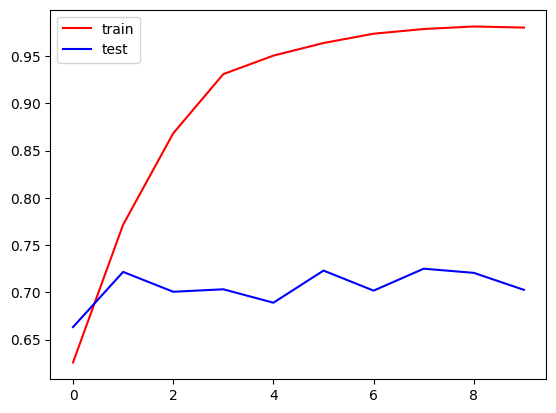

In [25]:
import matplotlib.pyplot as plt
plt.plot(hist2.history["accuracy"], color='r', label='train')
plt.plot(hist2.history["val_accuracy"], color='b', label='test')
plt.legend()
plt.show()

We ca see here littile improvement in model ,
Lets improve more


In [26]:
model3 = tf.keras.Sequential()
# lets prepare 3 conv and 3 dense layer

model3.add(tf.keras.layers.Conv2D(32, kernel_size=(3,3), padding="valid", activation="relu", input_shape=(256,256,3)))
model3.add(tf.keras.layers.BatchNormalization())
model3.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2),strides=2, padding="valid"))

model3.add(tf.keras.layers.Conv2D(64, kernel_size=(3,3), padding="valid", activation="relu", strides=2))
model3.add(tf.keras.layers.BatchNormalization())
model3.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2),strides=2, padding="valid"))

model3.add(tf.keras.layers.Conv2D(128, kernel_size=(3,3), padding="valid", activation="relu", strides=2))
model3.add(tf.keras.layers.BatchNormalization())
model3.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2),strides=2, padding="valid"))


#Flatten the tensor to 1 D Array to pass into Dense layer

model3.add(tf.keras.layers.Flatten())

#Pass to Dense layer

model3.add(tf.keras.layers.Dense(128, activation="relu"))

model3.add(tf.keras.layers.Dense(64, activation="relu"))
model3.add(tf.keras.layers.Dense(32, activation="relu"))

model3.add(tf.keras.layers.Dense(1, activation="sigmoid")) ##sigmoid because we have to do binary classification

In [27]:
model3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 batch_normalization_2 (Bat  (None, 254, 254, 32)      128       
 chNormalization)                                                
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_7 (Conv2D)           (None, 63, 63, 64)        18496     
                                                                 
 batch_normalization_3 (Bat  (None, 63, 63, 64)        256       
 chNormalization)                                                
                                                      

We can see Trainable paramter decreased

In [28]:
model3.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])
hist3= model3.fit(train_ds,batch_size=32, validation_data= validate_ds, epochs=10)

Epoch 1/10
625/625 [==============================] - 58s 85ms/step - loss: 0.5665 - accuracy: 0.7073 - val_loss: 0.6317 - val_accuracy: 0.6874
Epoch 2/10
625/625 [==============================] - 52s 83ms/step - loss: 0.4299 - accuracy: 0.7996 - val_loss: 0.4511 - val_accuracy: 0.7872
Epoch 3/10
625/625 [==============================] - 51s 81ms/step - loss: 0.3369 - accuracy: 0.8520 - val_loss: 0.7242 - val_accuracy: 0.7054
Epoch 4/10
625/625 [==============================] - 49s 79ms/step - loss: 0.2622 - accuracy: 0.8888 - val_loss: 0.4956 - val_accuracy: 0.8150
Epoch 5/10
625/625 [==============================] - 51s 81ms/step - loss: 0.1848 - accuracy: 0.9248 - val_loss: 0.5592 - val_accuracy: 0.8078
Epoch 6/10
625/625 [==============================] - 53s 83ms/step - loss: 0.1276 - accuracy: 0.9506 - val_loss: 1.2376 - val_accuracy: 0.7842
Epoch 7/10
625/625 [==============================] - 50s 79ms/step - loss: 0.0938 - accuracy: 0.9639 - val_loss: 1.2440 - val_accuracy:

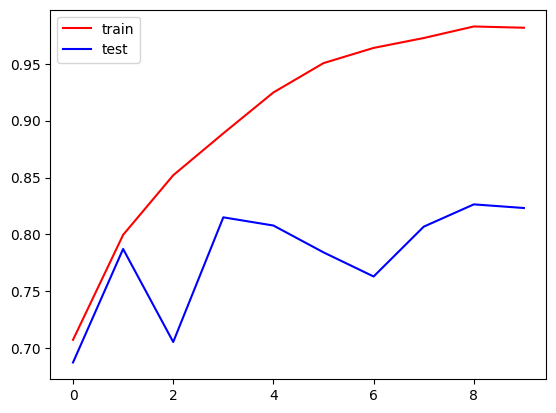

In [29]:
import matplotlib.pyplot as plt
plt.plot(hist3.history["accuracy"], color='r', label='train')
plt.plot(hist3.history["val_accuracy"], color='b', label='test')
plt.legend()
plt.show()

We cans see gap reduced between train and test

In [30]:
model4 = tf.keras.Sequential()
# lets prepare 3 conv and 3 dense layer

model4.add(tf.keras.layers.Conv2D(32, kernel_size=(3,3), padding="valid", activation="relu", input_shape=(256,256,3)))
model4.add(tf.keras.layers.BatchNormalization())
model4.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2),strides=2, padding="valid"))

model4.add(tf.keras.layers.Conv2D(64, kernel_size=(3,3), padding="valid", activation="relu", strides=2))
model4.add(tf.keras.layers.BatchNormalization())
model4.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2),strides=2, padding="valid"))

model4.add(tf.keras.layers.Conv2D(128, kernel_size=(3,3), padding="valid", activation="relu", strides=2))
model4.add(tf.keras.layers.BatchNormalization())
model4.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2),strides=2, padding="valid"))

model4.add(tf.keras.layers.Conv2D(256, kernel_size=(3,3), padding="valid", activation="relu", strides=2))
model4.add(tf.keras.layers.BatchNormalization())
model4.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2),strides=2, padding="valid"))
#Flatten the tensor to 1 D Array to pass into Dense layer

model4.add(tf.keras.layers.Flatten())

#Pass to Dense layer
model4.add(tf.keras.layers.Dense(256, activation="relu"))
model4.add(tf.keras.layers.Dense(128, activation="relu"))

model4.add(tf.keras.layers.Dense(64, activation="relu"))
model4.add(tf.keras.layers.Dense(32, activation="relu"))

model4.add(tf.keras.layers.Dense(1, activation="sigmoid")) ##sigmoid because we have to do binary classification

In [31]:
model4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 batch_normalization_5 (Bat  (None, 254, 254, 32)      128       
 chNormalization)                                                
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 127, 127, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 63, 63, 64)        18496     
                                                                 
 batch_normalization_6 (Bat  (None, 63, 63, 64)        256       
 chNormalization)                                                
                                                      

In [32]:
model4.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])
hist3= model4.fit(train_ds,batch_size=32, validation_data= validate_ds, epochs=10)

Epoch 1/10
625/625 [==============================] - 57s 84ms/step - loss: 0.5797 - accuracy: 0.6928 - val_loss: 1.0346 - val_accuracy: 0.5486
Epoch 2/10
625/625 [==============================] - 55s 87ms/step - loss: 0.4556 - accuracy: 0.7849 - val_loss: 0.5679 - val_accuracy: 0.6942
Epoch 3/10
625/625 [==============================] - 51s 80ms/step - loss: 0.3704 - accuracy: 0.8334 - val_loss: 1.2671 - val_accuracy: 0.5906
Epoch 4/10
625/625 [==============================] - 50s 79ms/step - loss: 0.2963 - accuracy: 0.8688 - val_loss: 0.5013 - val_accuracy: 0.7422
Epoch 5/10
625/625 [==============================] - 52s 83ms/step - loss: 0.2363 - accuracy: 0.8968 - val_loss: 0.5167 - val_accuracy: 0.7878
Epoch 6/10
625/625 [==============================] - 50s 79ms/step - loss: 0.1839 - accuracy: 0.9237 - val_loss: 0.4969 - val_accuracy: 0.7860
Epoch 7/10
625/625 [==============================] - 52s 83ms/step - loss: 0.1460 - accuracy: 0.9422 - val_loss: 0.6060 - val_accuracy:

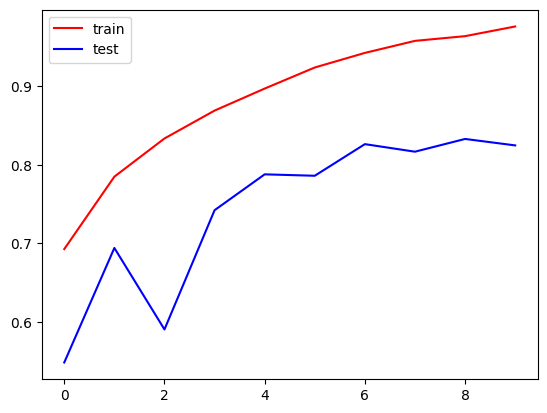

In [33]:
import matplotlib.pyplot as plt
plt.plot(hist3.history["accuracy"], color='r', label='train')
plt.plot(hist3.history["val_accuracy"], color='b', label='test')
plt.legend()
plt.show()

In [34]:
model4.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])
hist5= model4.fit(train_ds,batch_size=32, validation_data= validate_ds, epochs=13)

Epoch 1/13
625/625 [==============================] - 54s 79ms/step - loss: 0.0645 - accuracy: 0.9762 - val_loss: 0.7720 - val_accuracy: 0.8196
Epoch 2/13
625/625 [==============================] - 54s 86ms/step - loss: 0.0634 - accuracy: 0.9754 - val_loss: 0.7834 - val_accuracy: 0.8354
Epoch 3/13
625/625 [==============================] - 52s 83ms/step - loss: 0.0473 - accuracy: 0.9827 - val_loss: 0.7262 - val_accuracy: 0.8340
Epoch 4/13
625/625 [==============================] - 52s 83ms/step - loss: 0.0455 - accuracy: 0.9826 - val_loss: 0.9679 - val_accuracy: 0.8226
Epoch 5/13
625/625 [==============================] - 50s 80ms/step - loss: 0.0433 - accuracy: 0.9839 - val_loss: 0.7867 - val_accuracy: 0.8324
Epoch 6/13
625/625 [==============================] - 50s 79ms/step - loss: 0.0387 - accuracy: 0.9859 - val_loss: 0.8905 - val_accuracy: 0.8378
Epoch 7/13
625/625 [==============================] - 50s 80ms/step - loss: 0.0367 - accuracy: 0.9873 - val_loss: 0.6579 - val_accuracy:

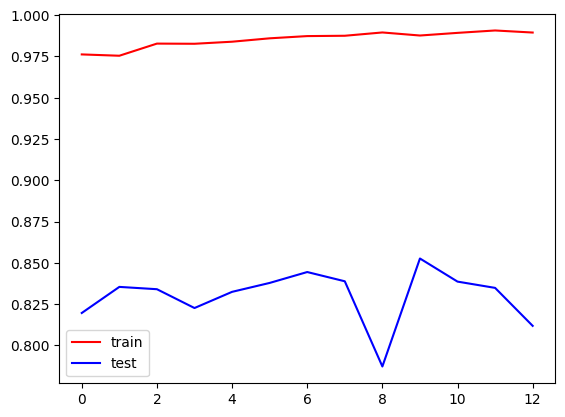

In [35]:
import matplotlib.pyplot as plt
plt.plot(hist5.history["accuracy"], color='r', label='train')
plt.plot(hist5.history["val_accuracy"], color='b', label='test')
plt.legend()
plt.show()